In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [ ]:
#Download data here: https://drive.google.com/file/d/1_-kRegOMJmIMG6-XnDwYKnADdNounmKm/view?usp=sharing
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
#Objects need to be converted into categorical data

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **EDA**

Text(0.5, 1.0, 'Distribution of Charges')

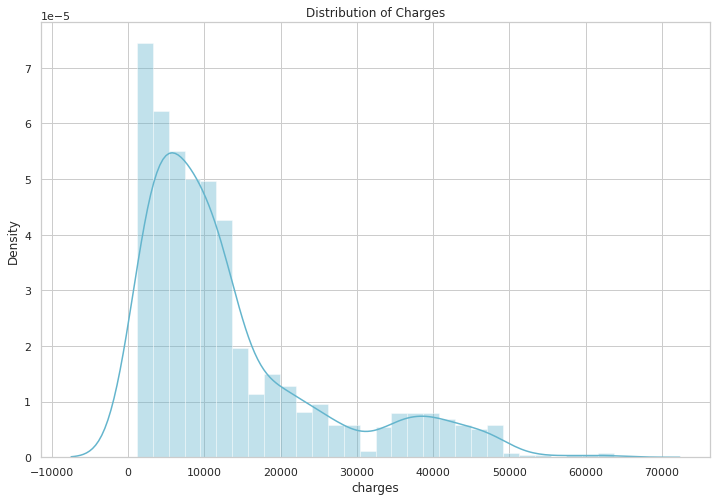

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

**Apply Natural Log**

Data terlalu miring (skewed) sehingga tidak mencerminkan normal distribusi. Oleh karena itu apply Natural Log untuk membuat data menjadi distribusi normal atau mencapai varian konstan.

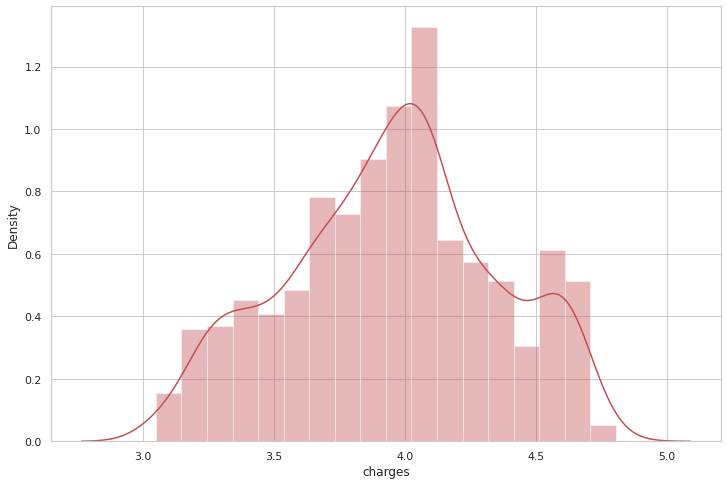

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r')

**Check per Region**

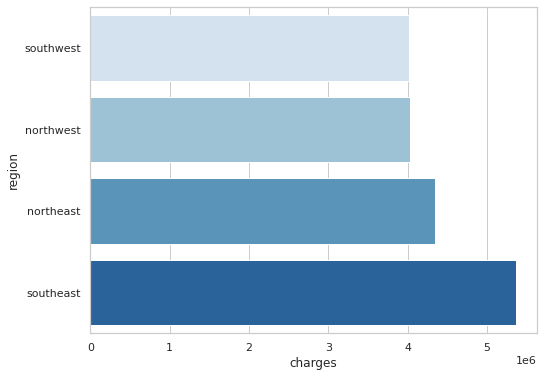

In [ ]:
#Univariate
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

**Charges Per Region Based on Sex**

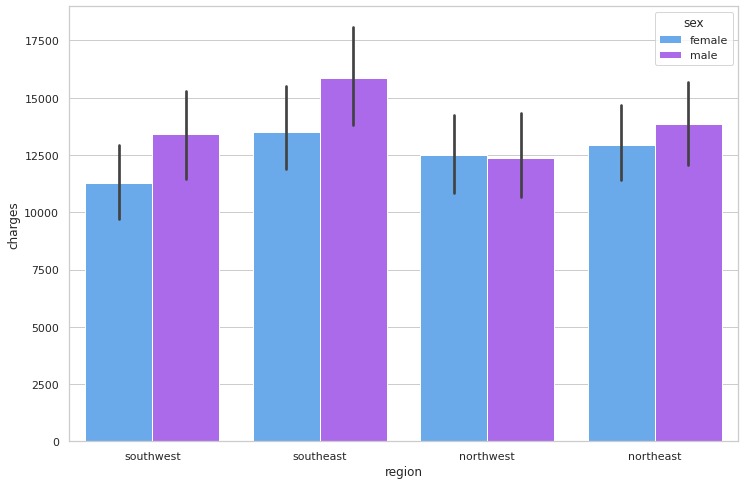

In [ ]:
# Multivariate Analysis
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

**Charges per Region Based on Smoker**

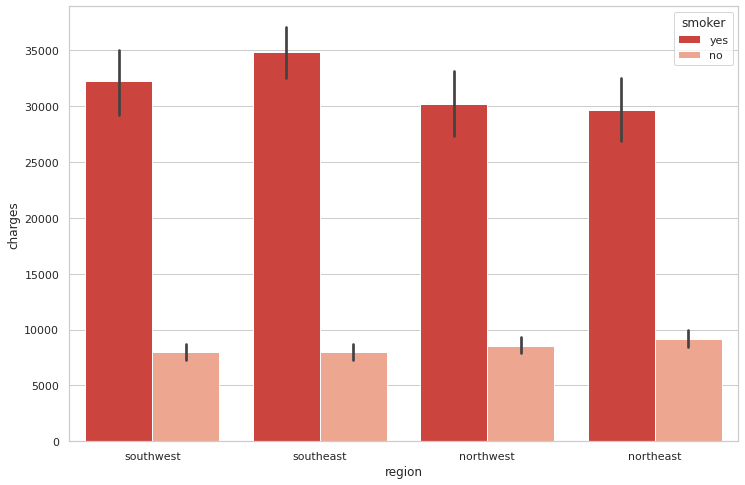

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

**Charges per Region Based on How Many Children**

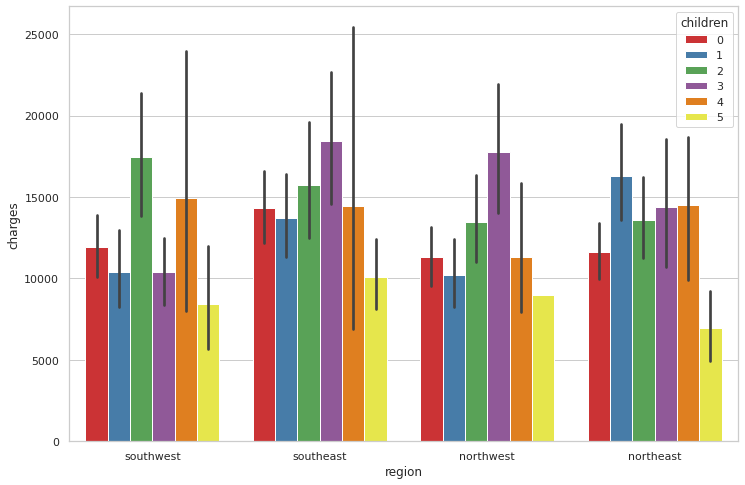

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

# **Analisa Medical charges berdasarkan faktor 'Smoker' dengan prediktor lain**

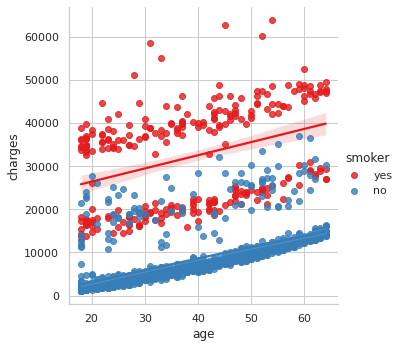

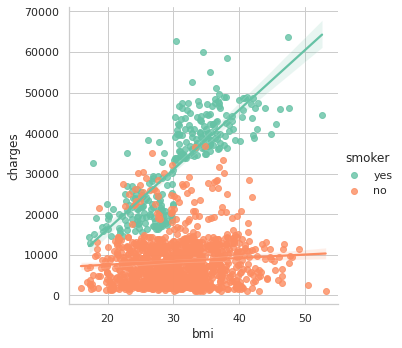

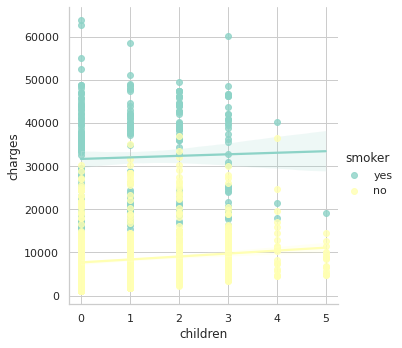

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

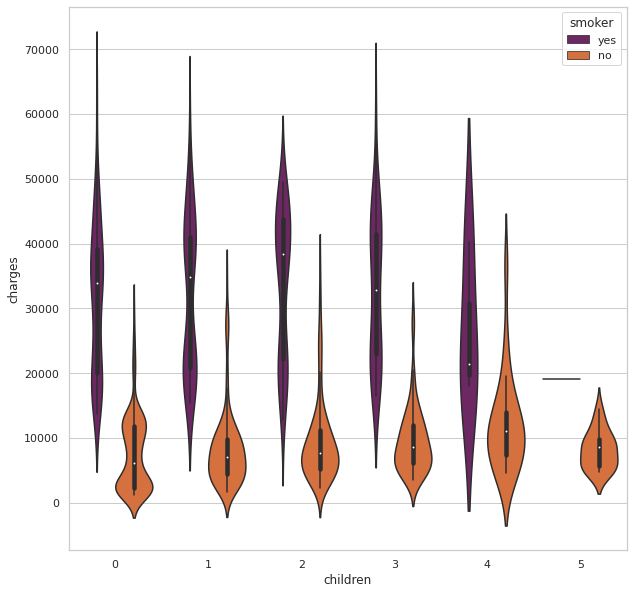

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

# **Data Preprocessing**

In [ ]:
#Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.sex = label.fit_transform(df.sex)
df.smoker = label.fit_transform(df.smoker)
df.region = label.fit_transform(df.region)
# df.dtypes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


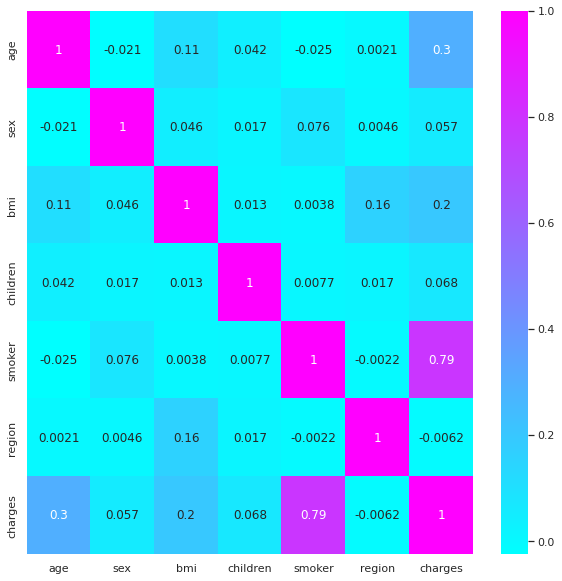

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="cool")

# **Algoritma**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = df.drop(['charges'], axis = 1) #Prediktor
y = df['charges'] #Label
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

**Linear Regression**

In [ ]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_train_pred = Lin_reg.predict(x_train)
y_test_pred = Lin_reg.predict(x_test)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.83892903954
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495825
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


# **Evaluating Model**

In [ ]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.13415943
Root Mean Squared Error: 5643.219748880902


In [ ]:
##Predicting the charges
y_test_pred = Lin_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df


,Actual,Predicted
578,9724.53000,11017.230479
610,8547.69130,9787.530168
569,45702.02235,37994.782118
1034,12950.07120,16122.778407
198,9644.25250,6930.759230
...,...,...
1084,15019.76005,14699.098767
726,6664.68595,8210.854549
1132,20709.02034,16019.284542
725,40932.42950,33104.944084


# **Menyimpan Model ke Pickle**

In [ ]:
#saving the model for the app (pilih model terbaik)
pickle.dump(Lin_reg, open('Lin_reg.pkl','wb'))

# **Mengintegrasi Model kedalam Flask**

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#membuat API dengan flask
from flask import Flask
from flask import jsonify, request
from flask_ngrok import run_with_ngrok
from datetime import datetime

app=Flask(__name__)
run_with_ngrok(app)

@app.route('/',methods=['GET'])
def index():
  return jsonify({"Nama":"Anita API Sukses"})

@app.route('/predict', methods=['GET'])
def result():
  df=pd.read_csv('insurance.csv',index_col=0) #gunakan lagi dataset diatas
  data=request.json #ini adalah dataset yang kita uji melalui postman
  df1=pd.DataFrame(data,index=[0])

  #Data Pre-Processing
  label_sex=LabelEncoder()
  label_smoker=LabelEncoder()
  label_region=LabelEncoder()

  #data preprocessing csv
  df.sex = label_sex.fit_transform(df.sex)
  df.smoker = label_smoker.fit_transform(df.smoker)
  df.region = label_region.fit_transform(df.region)

  #data pre-processing dari postman
  df1.sex = label_sex.transform(df1.sex)
  df1.smoker = label_smoker.transform(df1.smoker)
  df1.region = label_region.transform(df1.region)

  #load model
  with open("Lin_reg.pkl","rb") as file:
    Lin_reg = pickle.load(file)

  prediction = Lin_reg.predict(df1)
  print(prediction)

  #masukin user input kedalam data collection
  data['Prediction']=prediction[0]
  data['Datetime']=datetime.now().strftime("%Y-%m-%d")

  with open("data_collection.txt","a") as file:
    file.write("%s\n" %data)

  return jsonify({"Status":"Berhasil", "prediction":str(prediction[0])})

if __name__ =='__main__':
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4a49-34-71-70-103.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Nov/2022 14:44:47] "GET /predict HTTP/1.1" 200 -


[6586.337542]
